In [6]:
# !unzip "/home/f4th3r/Documents/env/pnevmoniya.zip"

In [7]:
# %pip install ipywidgets

In [1]:
from fastai.vision.all import  *
# from ipywidgets import widgets

path =Path('/home/f4th3r/Documents/env/train')

#DataBlock
transports = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items= get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

#DataLoader
dls = transports.dataloaders(path)

#dataset
# dls.train.show_batch(max_n=32,nrows=4)

#Train(Learning)
learn = cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(2)

/home/f4th3r/Documents/env/venv/lib/python3.11/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,0.457321,0.206295,0.931927,04:07


epoch,train_loss,valid_loss,accuracy,time
0,0.137880,0.142002,0.970278,05:56
1,0.080133,0.076829,0.979866,05:40


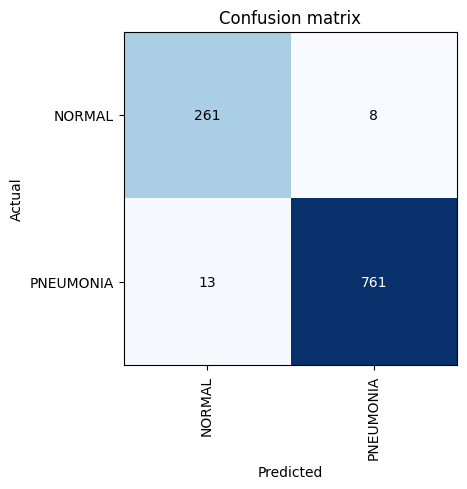

In [2]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [4]:


submit = pd.read_csv("/home/f4th3r/Documents/env/sample_solution.csv")
submit.head()

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0


In [ ]:
# result = []
# for x in range(len(submit)):
#     label = submit.loc[x, 'id']
#     img = PILImage.create(Path(f"/home/f4th3r/Documents/env/test/{label}"))
#     pred, pred_id, probs = learn.predict(img)
#     pred = 1 if pred=='PNEUMONIA' else 0 
#     result.append(pred)